In [2]:
from numpy import *
import matplotlib.pyplot as plt  
import scipy.linalg
import pandas as pd
import datetime
import dateutil

In [3]:
data = pd.read_csv('/home/shin/Documents/bbdc/bbdc_2018/train.csv', sep = ',')

In [4]:
len(data)

52508

In [5]:
data.head()

,Datum,Windgeschwindigkeit48M,Windgeschwindigkeit100M,Windgeschwindigkeit152M,Windrichtung48M,Windrichtung100M,Windrichtung152M,Windgeschwindigkeit100MP10,Windgeschwindigkeit100MP20,Windgeschwindigkeit100MP30,Windgeschwindigkeit100MP40,Windgeschwindigkeit100MP50,Windgeschwindigkeit100MP60,Windgeschwindigkeit100MP70,Windgeschwindigkeit100MP80,Windgeschwindigkeit100MP90,Interpoliert,Verfügbare_Kapazität,Output
0,2016-01-01 00:00:00,8.490,10.7700,12.690,188.00,190.0,194.00,9.0700,9.630,10.060,10.43,10.78,11.0500,11.5400,11.940,12.4200,0,122400.0,79168
1,2016-01-01 00:15:00,8.395,10.6175,12.475,190.75,193.0,196.75,9.0425,9.555,9.955,10.31,10.63,10.9275,11.3875,11.815,12.3125,1,122400.0,75124
2,2016-01-01 00:30:00,8.300,10.4650,12.260,193.50,196.0,199.50,9.0150,9.480,9.850,10.19,10.48,10.8050,11.2350,11.690,12.2050,1,122400.0,76072
3,2016-01-01 00:45:00,8.205,10.3125,12.045,196.25,199.0,202.25,8.9875,9.405,9.745,10.07,10.33,10.6825,11.0825,11.565,12.0975,1,122400.0,67964
4,2016-01-01 01:00:00,8.110,10.1600,11.830,199.00,202.0,205.00,8.9600,9.330,9.640,9.95,10.18,10.5600,10.9300,11.440,11.9900,0,122400.0,69988


In [6]:
## Parsing Date and time (Seconds omited because they are all '0')

date = data.Datum
Year = []
Month = []
Day = []
Hour = []
Minute = []
for i in date:
    dateparse = datetime.datetime.strptime(i, "%Y-%m-%d %H:%M:%S")
    Year.append(dateparse.year)
    Month.append(dateparse.month)
    Day.append(dateparse.day)
    Hour.append(dateparse.hour)
    Minute.append(dateparse.minute)
data.insert(0, 'Year', Year)
data.insert(1, 'Month', Month)
data.insert(2, 'Day', Day)
data.insert(3, 'Hour', Hour)
data.insert(4, 'Min', Minute)
data = data.drop(['Datum'], axis = 1)

In [7]:
data.head()

,Year,Month,Day,Hour,Min,Windgeschwindigkeit48M,Windgeschwindigkeit100M,Windgeschwindigkeit152M,Windrichtung48M,Windrichtung100M,...,Windgeschwindigkeit100MP30,Windgeschwindigkeit100MP40,Windgeschwindigkeit100MP50,Windgeschwindigkeit100MP60,Windgeschwindigkeit100MP70,Windgeschwindigkeit100MP80,Windgeschwindigkeit100MP90,Interpoliert,Verfügbare_Kapazität,Output
0,2016,1,1,0,0,8.490,10.7700,12.690,188.00,190.0,...,10.060,10.43,10.78,11.0500,11.5400,11.940,12.4200,0,122400.0,79168
1,2016,1,1,0,15,8.395,10.6175,12.475,190.75,193.0,...,9.955,10.31,10.63,10.9275,11.3875,11.815,12.3125,1,122400.0,75124
2,2016,1,1,0,30,8.300,10.4650,12.260,193.50,196.0,...,9.850,10.19,10.48,10.8050,11.2350,11.690,12.2050,1,122400.0,76072
3,2016,1,1,0,45,8.205,10.3125,12.045,196.25,199.0,...,9.745,10.07,10.33,10.6825,11.0825,11.565,12.0975,1,122400.0,67964
4,2016,1,1,1,0,8.110,10.1600,11.830,199.00,202.0,...,9.640,9.95,10.18,10.5600,10.9300,11.440,11.9900,0,122400.0,69988


In [8]:
data.tail()

,Year,Month,Day,Hour,Min,Windgeschwindigkeit48M,Windgeschwindigkeit100M,Windgeschwindigkeit152M,Windrichtung48M,Windrichtung100M,...,Windgeschwindigkeit100MP30,Windgeschwindigkeit100MP40,Windgeschwindigkeit100MP50,Windgeschwindigkeit100MP60,Windgeschwindigkeit100MP70,Windgeschwindigkeit100MP80,Windgeschwindigkeit100MP90,Interpoliert,Verfügbare_Kapazität,Output
52503,2017,6,30,22,45,4.92,5.9475,6.58,269.25,271.25,...,5.4325,5.73,6.0125,6.2125,6.4175,6.7325,7.2175,1,119000.0,13688
52504,2017,6,30,23,0,5.03,6.0900,6.73,269.00,271.00,...,5.5700,5.87,6.1600,6.3600,6.5700,6.8700,7.3500,0,119000.0,17624
52505,2017,6,30,23,15,5.03,6.0900,6.73,269.00,271.00,...,5.5700,5.87,6.1600,6.3600,6.5700,6.8700,7.3500,1,119000.0,18528
52506,2017,6,30,23,30,5.03,6.0900,6.73,269.00,271.00,...,5.5700,5.87,6.1600,6.3600,6.5700,6.8700,7.3500,1,119000.0,15836
52507,2017,6,30,23,45,5.03,6.0900,6.73,269.00,271.00,...,5.5700,5.87,6.1600,6.3600,6.5700,6.8700,7.3500,1,119000.0,15712


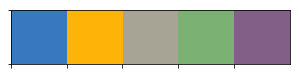

In [9]:
import seaborn as sns
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

In [10]:
#Data Visualization 

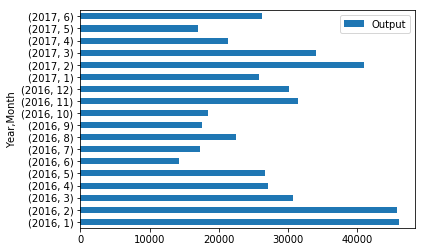

In [11]:
#Average Output per Month
outputpermonth_avg = data.groupby(['Year','Month'])[['Output']].mean()
outputpermonth_avg.plot(kind='barh')

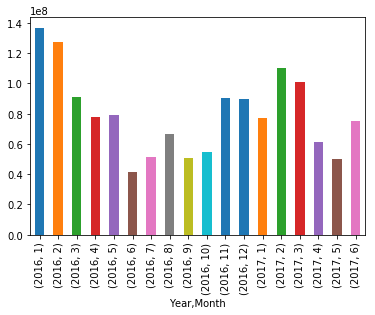

In [12]:
#Total Output per Month
outputpermonth_sum = data.groupby(['Year','Month'])['Output'].sum()
outputpermonth_sum.plot(kind='bar')

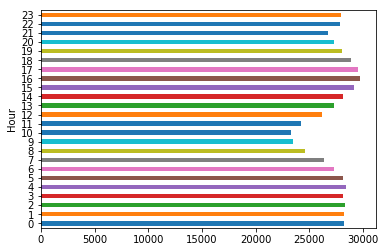

In [13]:
outputperhour_avg = data.groupby(['Hour'])['Output'].mean()
outputperhour_avg.plot(kind='barh')

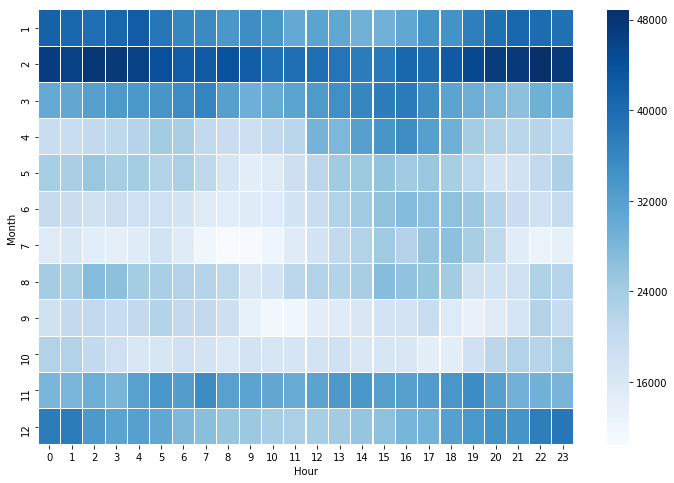

In [14]:
# Heatmap of output by Month and Hour
heat = data.groupby(['Month','Hour'], as_index=False)[['Output']].mean()
heatpivot = heat.pivot('Month','Hour','Output')
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatpivot, annot=False, fmt="d", linewidths=.12, ax=None, cbar_ax = None, cmap="Blues")

In [15]:
#Candle Stick: Daily OHLC(Open, High, Low, Close)
outputperday_high = data.groupby(['Year','Month','Day'])[['Output']].max()
outputperday_low = data.groupby(['Year','Month','Day'])['Output'].min()
outputperday_first = data.groupby(['Year','Month','Day'])['Output'].first()
outputperday_last = data.groupby(['Year','Month','Day'])['Output'].last()

In [16]:
datereset = outputperday_high.reset_index()
dateindex = []
for i in range(len(outputperday_high)):
    dateindex.append(datetime.date(datereset.Year[i], datereset.Month[i], datereset.Day[i]))

In [17]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='shinjjo', api_key = 's3ulHJw8GjbATqtV5lH9')
candle = go.Candlestick(x=dateindex,
                       open= outputperday_first.get_values() ,
                       high= outputperday_high.get_values(),
                       low= outputperday_low.get_values(),
                       close= outputperday_last.get_values(),
                       increasing=dict(line=dict(color= '#17BECF')),
                       decreasing=dict(line=dict(color= '#7F7F7F')))
candledata = [candle]
py.iplot(candledata, filename='styled_candlestick')

In [18]:
data.head()

,Year,Month,Day,Hour,Min,Windgeschwindigkeit48M,Windgeschwindigkeit100M,Windgeschwindigkeit152M,Windrichtung48M,Windrichtung100M,...,Windgeschwindigkeit100MP30,Windgeschwindigkeit100MP40,Windgeschwindigkeit100MP50,Windgeschwindigkeit100MP60,Windgeschwindigkeit100MP70,Windgeschwindigkeit100MP80,Windgeschwindigkeit100MP90,Interpoliert,Verfügbare_Kapazität,Output
0,2016,1,1,0,0,8.490,10.7700,12.690,188.00,190.0,...,10.060,10.43,10.78,11.0500,11.5400,11.940,12.4200,0,122400.0,79168
1,2016,1,1,0,15,8.395,10.6175,12.475,190.75,193.0,...,9.955,10.31,10.63,10.9275,11.3875,11.815,12.3125,1,122400.0,75124
2,2016,1,1,0,30,8.300,10.4650,12.260,193.50,196.0,...,9.850,10.19,10.48,10.8050,11.2350,11.690,12.2050,1,122400.0,76072
3,2016,1,1,0,45,8.205,10.3125,12.045,196.25,199.0,...,9.745,10.07,10.33,10.6825,11.0825,11.565,12.0975,1,122400.0,67964
4,2016,1,1,1,0,8.110,10.1600,11.830,199.00,202.0,...,9.640,9.95,10.18,10.5600,10.9300,11.440,11.9900,0,122400.0,69988


In [19]:
data.Output.max()

120520

In [20]:
data.Windrichtung48M.min()

0.0

In [21]:

parallel = [
    go.Parcoords(
        line = dict(color = 'blue'),
        dimensions = list([
            dict(range = [0,24],
                 constraintrange = [1,4],
                 label = 'Windgeschwindigkeit48M', values = data.Windgeschwindigkeit48M[0:10000]),
            dict(range = [0,24],
                 label = 'Windgeschwindigkeit100M', values = data.Windgeschwindigkeit100M[0:10000]),
            dict(range = [0,24],
                 constraintrange = [1,4],
                 label = 'Windgeschwindigkeit152M', values = data.Windgeschwindigkeit152M[0:10000]),
            dict(range = [-1700,121000],
                 label = 'Output', values = data.Output[0:10000])
        ])
    )
]

py.iplot(parallel, filename = 'parcoord-dimensions')

In [22]:

parallel_direction = [
    go.Parcoords(
        line = dict(color = 'blue'),
        dimensions = list([
            dict(range = [0,360],
                 constraintrange = [1,4],
                 label = 'Windrichtung48M', values = data.Windrichtung48M[0:10000]),
            dict(range = [0,360],
                 label = 'Windrichtung100M', values = data.Windrichtung100M[0:10000]),
            dict(range = [0,360],
                 constraintrange = [1,4],
                 label = 'Windrichtung152M', values = data.Windrichtung152M[0:10000]),
            dict(range = [-1700,121000],
                 label = 'Output', values = data.Output[0:10000])
        ])
    )
]

py.iplot(parallel_direction, filename = 'parcoord-dimensions')

In [23]:
# Altitude Windspeed
parallel_altitude = [
    go.Parcoords(
        line = dict(color = 'blue'),
        dimensions = list([
            dict(range = [0,22],
                 constraintrange = [1,4],
                 label = 'MP10', values = data.Windgeschwindigkeit100MP10[0:10000]),
            dict(range = [0,22],
                 label = 'MP20', values = data.Windgeschwindigkeit100MP20[0:10000]),
            dict(range = [0,22],
                 label = 'MP30', values = data.Windgeschwindigkeit100MP30[0:10000]),
            dict(range = [0,22],
                 label = '40', values = data.Windgeschwindigkeit100MP40[0:10000]),
            dict(range = [0,22],
                 label = 'MP50', values = data.Windgeschwindigkeit100MP50[0:10000]),
            dict(range = [0,22],
                 label = 'MP60', values = data.Windgeschwindigkeit100MP60[0:10000]),
            dict(range = [0,22],
                 label = 'MP70', values = data.Windgeschwindigkeit100MP70[0:10000]),
            dict(range = [0,22],
                 label = 'MP80', values = data.Windgeschwindigkeit100MP80[0:10000]),
            dict(range = [0,22],
                 constraintrange = [1,4],
                 label = 'MP90', values = data.Windgeschwindigkeit100MP90[0:10000]),
            dict(range = [-1700,121000],
                 label = 'Output', values = data.Output[0:10000])
        ])
    )
]

py.iplot(parallel_altitude, filename = 'parcoord-dimensions')

In [186]:
data.Windgeschwindigkeit100MP30.min()

0.14